# <center> Manipulación de datos con Pandas </center>

<center> <img src="https://drive.google.com/uc?export=view&id=1INS1MCIbEfjzFle1JNV5l7KftHlUyyBk" alt="image info" width="400"/> </center>

* Biblioteca diseñada para análisis y manipulación de datos.
* El nombre viene de **PANel DAta**, que es un término común para conjuntos de datos multidimensionales usualmente utilizados en estadística.
* Construida sobre NumPy.
* Implementa muchas operaciones de datos que pueden resultar familiares a usuarios de bases de datos o hojas de cálculo.

<!- El nombre viene de Panel Data ->

Pandas se importa como cualquier módulo ya visto.

In [1]:
import numpy as np
import pandas as pd #pd es una convención
pd.__version__

'1.3.5'

In [2]:
?pd

* Los datos en Pandas se manejan a través de dos importantes objetos o estructuras: **Series** y **DataFrame**.
* Ambas estructuras pueden ser vistas como versiones *mejoradas* de estructuras NumPy.

# Series

* Una serie es un arreglo **unidimensional** de datos indexados. 
* Los valores que se guardan en esta estructura tienen un índice, tal y como en el caso de las listas y los arreglos.
* La creación de una serie se basa en el comando:

```
pd.Series(estructura_de_datos,index=lista_de_indices)
```
## Series a partir de listas


In [3]:
# Serie es un arreglo unidimensional pero con un indice explicito.
#Si no paso los indices, me crea valores iniciando en 0.
# A la izquierda esta la columna de indices que me crea y ademas imprime el tipo de objeto

s1 = pd.Series([10,20.45,3,'cuatro',True,6.0]) #El índice por defecto empezará en cero
s1

0        10
1     20.45
2         3
3    cuatro
4      True
5       6.0
dtype: object

Como se puede observar, una serie de Pandas engloba tanto a una secuencia de valores como una secuencia de índices.

In [4]:
#Estan construidas sobre arreglos de numpy, teniendo una columna de indices y otra de los datos.

type(s1.values) #Tipo de dato, arreglos de NumPy

numpy.ndarray

In [5]:
#Indica que es una secuencia de valores entre 0 y 6.

s1.index

RangeIndex(start=0, stop=6, step=1)

## Series a partir de diccionarios

Si se usa un diccionario para construir la serie, las llaves se toman como índices y los valores los números de la serie.

In [6]:
#Los diccionarios van entre corchetes, y se pone la clave/llave y su valor.
#La serie toma la llave/clave como el indice y el valor como el dato.

dicc = {'a':1,'b':2,'c':3}
s2 = pd.Series(dicc)
s2

a    1
b    2
c    3
dtype: int64

Con **index**, se puede cambiar el orden en que se insertan los datos en la serie.

In [7]:
s3 = pd.Series(dicc,index=['c','a','b'])
s3

c    3
a    1
b    2
dtype: int64

* Para acceder a un dato específico de la serie, hay que acceder al índice del mismo como con arreglos y listas.
* De igual manera que con estas estructuras, a las series se les puede hacer *slicing*.

In [8]:
#Se pueden usar indices explicitos o indices implicitos
#Indice explicito es el que uno le da
#Indice implicito es el que le da la serie
#En este ejemplo se ve como usar los distintos indices.

print(s3['b'], s3[2], s3[-1])

2 2 2


In [9]:
#Imprime del elementos 2 al 6 por indice implicito.

s1[2:6]

2         3
3    cuatro
4      True
5       6.0
dtype: object

**La diferencia entre un objeto Series de Pandas y un array de NumPy es la presencia de los índices.** En NumPy los índices están implícitamente definidos y son números enteros, en Pandas Series los índices se definen además explícitamente.

En Pandas Series también podemos indexar y manipular como si se tratara de la estructura original.

In [10]:
codigos = pd.Series({'San José':1,'Alajuela':2,'Cartago':3,'Heredia':4}) #Creamos una serie a partir de un diccionario
codigos

San José    1
Alajuela    2
Cartago     3
Heredia     4
dtype: int64

In [11]:
#Esto se usa para preguntar si 'algo' no esta presente en dicha serie.

'Guanacaste' not in codigos #Buscamos por índice

True

In [12]:
codigos.keys() #Imprimimos las claves del diccionario original

Index(['San José', 'Alajuela', 'Cartago', 'Heredia'], dtype='object')

In [13]:
#contruye una lista usando un metodo de los diccionarios.

list(codigos.items()) #Lista de elementos con los pares clave-valor del diccionario

[('San José', 1), ('Alajuela', 2), ('Cartago', 3), ('Heredia', 4)]

In [14]:
codigos['Guanacaste'] = 5 #Añadimos un nuevo elemento como en los diccionarios
codigos

San José      1
Alajuela      2
Cartago       3
Heredia       4
Guanacaste    5
dtype: int64

## Filtrando datos por índice y a partir de condicionales

Podemos usar una "máscara" para encontrar ciertos elementos en nuestros datos.

In [15]:
#Creo una mascara con una condicion.

mask = (codigos>2) & (codigos<=5) #Máscara, simplemente una condición

codigos[mask] #Devuelve elementos de la serie que cumplen
#Se podria poner directamente la condicion entre los []

Cartago       3
Heredia       4
Guanacaste    5
dtype: int64

También podemos elegir los elementos por índice.

In [16]:
codigos[['Alajuela','Guanacaste']]

Alajuela      2
Guanacaste    5
dtype: int64

# DataFrame

* A grandes rasgos, el DataFrame es una tabla de datos.
* A diferencia de los *ndarrays* de NumPy, se pueden tener distintos tipos de datos **en las columnas**.
* Cada columna es un objeto de tipo Pandas Series.
* Las filas se identifican con un **índice** y las columnas con una **etiqueta**.

## Creando un DataFrame vacío

In [17]:
#Los data frames son el otro eje de estructuras que componen Pandas, son tablas de datos.

#aqui se crea el dataframe vacio
#No imprime nada

empt_df = pd.DataFrame()
empt_df

""


## DataFrame a partir de estructuras de datos

Los DataFrame se pueden crear también a partir de listas, diccionarios o incluso arreglos.

In [18]:

cod_df = pd.DataFrame(np.array([['San José',1],['Alajuela',2],['Cartago',3]])) #A partir de una lista
cod_df

,0,1
0,San José,1
1,Alajuela,2
2,Cartago,3


Cuando no se indican los nombres de las columnas ni los índices, las etiquetas por defecto serán números consecutivos empezando por 0, al igual que los índices.

In [19]:
cod_df_dicc = pd.DataFrame({'Nombre':['San José','Alajuela','Cartago'],'Codigo':[1,2,3]}) #A partir de un diccionario
cod_df_dicc

#La clave es 'Nombre', y los datos es lo que esta presente en esa columna.

,Nombre,Codigo
0,San José,1
1,Alajuela,2
2,Cartago,3


Creando el DataFrame de la forma anterior, obtenemos los nombres de las columnas a partir de las claves del diccionario.

## Asignando el nombre a las columnas y las filas

* Al crear el DataFrame, las etiquetas se pueden asignar usando el parámetro **columns**.
* Los índices también se pueden asignar con **index**.

In [20]:
cod_df_names = pd.DataFrame([['Heredia',4],['Guanacaste',5],['Puntarenas',6]],columns=['Nombre','Código'],index=['P1','P2','P3'])
cod_df_names

#aqui se especifica el nombre de las columnas y los indices.

,Nombre,Código
P1,Heredia,4
P2,Guanacaste,5
P3,Puntarenas,6


**columns** e **index** son atributos que pueden ser cambiados incluso después de haber creado el DataFrame.

In [21]:
cod_df #No tenía nombres asignados en filas ni columnas
#aqui no se le asigno ni nombre ni indice, en el siguiente codigo se le ponen

,0,1
0,San José,1
1,Alajuela,2
2,Cartago,3


In [22]:
cod_df.columns = ['Name','Code']
cod_df

,Name,Code
0,San José,1
1,Alajuela,2
2,Cartago,3


Además, podemos realizar operaciones con estos atributos, que devuelven estructuras iterables.

In [23]:
cod_df.index = ['P' + str(i) for i in cod_df.index]
#Agarro el indice y lo paso a ser un string, eso en cada indice del dataFrame
cod_df

,Name,Code
P0,San José,1
P1,Alajuela,2
P2,Cartago,3


## DataFrames a partir de Series

In [24]:
#aqui creo dos series con distintos datos.

s1 = pd.Series(['Carmen','Merced','Hospital'],index=[0,1,2])
s2 = pd.Series([10101,10102,10104],index=[0,1,3],dtype=object) #Esta serie no tien nada en el indice dos.

In [25]:
cod_distritos = pd.DataFrame({'Distrito':s1,'Código':s2})
cod_distritos
#NaN = Not a Number, se refiere a un valor faltante.

,Distrito,Código
0,Carmen,10101
1,Merced,10102
2,Hospital,NaN
3,NaN,10104


Notemos que el índice donde se inserta el dato se respeta. Los datos faltantes se rellenan como valores **NaN** o *Not a Number*.

# Trabajando los datos con Pandas

## ¿Cómo cargar datos desde un archivo?

* Con Pandas se pueden cargar datos desde diversos tipos de archivos, incluyendo hojas de Microsoft Excel. Pueden consultar más [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).
* Se debe indicar el *path* o dirección del archivo, así como el delimitador de los datos o el nombre de la hoja en algunos casos.
* **read_csv()** es una función que permite cargar datos desde un archivo **.csv** y guardarlos en un objeto de Pandas.

Usaremos esta función para cargar un archivo con los datos de un estudio de detección de enfermedades del corazón en pacientes. Las variables que contiene este set de datos son:

* Edad.
* Sexo (H o M).
* Tipo de dolor de pecho (escala 0-3).
* Presión sanguínea en reposo.
* Colesterol sérico (en mg/dL).
* Niveles de azúcar en ayunas mayores a > 120 mg/dL (1 = Sí, 0 = No).
* Ritmo cardíaco máximo.
* Presencia de una enfermedad del corazón (escala 0-4).

In [26]:
datosPacientes = pd.read_csv('pacientesCorazon.csv')
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


* La primera fila es tomada como las etiquetas. 
* En bases de datos donde no tenemos los nombres de las columnas en los archivos, el parámetro **names** nos permite asignar los nombres.  

In [27]:
nombres_columnas = ['edad', 'sexo', 'tipoDolor', 'presionReposo', 'colesterolSerico','azucarAyunas', 'latidosMax','presencia']

In [28]:
datosPacientesSN = pd.read_csv('pacientesCorazonSN.csv',names = nombres_columnas)
datosPacientesSN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


A veces los delimitadores son distintos, esto también debemos indicarlo.

In [29]:
datosPacientesPC = pd.read_csv('pacientesCorazonPC.csv') #Los datos no se leerán correctamente porque el delimitadores es ;
#pd.read_csv supone que el delimitador es una ,
datosPacientesPC

,edad;sexo;tipoDolor;presionReposo;colesterolSerico;azucarAyunas;latidosMax;presencia
0,63;H;3;145;233;1;150;0
1,37;H;2;130;250;0;187;2
2,41;M;1;130;204;0;172;1
3,56;H;1;120;236;0;178;0
4,57;M;0;120;354;0;163;0
...,...
298,57;M;0;140;241;0;123;1
299,45;H;3;110;264;0;132;2
300,68;H;0;144;193;1;141;3
301,57;H;0;130;131;0;115;1


In [30]:
datosPacientesPC = pd.read_csv('pacientesCorazonPC.csv',delimiter=';') #Los datos sí se leerán correctamente, aqui le indico cual es el delimitador.
datosPacientesPC

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


* Si no se desea usar la fila de encabezados, **header** es un parámetro que indica cuántas filas ocupan estos, por lo que se usa para omitir las etiquetas. 
* Cuando header = None, las etiquetas serán números establecidos por defecto.

In [31]:
datosPacientesSN = pd.read_csv('pacientesCorazon.csv',header= None)
datosPacientesSN 

,0,1,2,3,4,5,6,7
0,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
1,63,H,3,145,233,1,150,0
2,37,H,2,130,250,0,187,2
3,41,M,1,130,204,0,172,1
4,56,H,1,120,236,0,178,0
...,...,...,...,...,...,...,...,...
299,57,M,0,140,241,0,123,1
300,45,H,3,110,264,0,132,2
301,68,H,0,144,193,1,141,3
302,57,H,0,130,131,0,115,1


Como lo hacíamos con NumPy, también es posible omitir tantas filas como se quiera con el parámetro **skiprows**.

In [32]:
datosPacientesSN = pd.read_csv('pacientesCorazon.csv',header=None,skiprows=1) 
datosPacientesSN

,0,1,2,3,4,5,6,7
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


## Funciones que "exploran" los datos

Pandas está ideado para el manejo de bases de datos muy grandes, por lo que tiene algunas utilidades para su observación.

In [33]:
datosPacientes.head(2) #Imprime las dos primeras filas del DataFrame

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2


In [34]:
datosPacientes.tail(3) #Imprime las tres ultimas filas del DataFrame

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1
302,57,M,1,130,236,0,174,0


Por facilidad de lectura, las etiquetas se imprimen siempre.

También podemos "muestrear" a partir del DataFrame.

In [35]:
datosPacientes.sample(5) #Muestreo aleatorio, devuelve la cantidad de elementos solicitada

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
205,52,H,0,128,255,0,161,3
26,59,H,2,150,212,1,157,0
14,58,M,3,150,283,1,162,0
136,60,M,2,120,178,1,96,4
122,41,M,2,112,268,0,172,0


## Modificación de los datos

### Adición de filas y columnas

In [36]:
datosPacientes['No.Seguro'] = pd.Series(np.random.random(303)*(1e9)) #Agrega una columna llamada No. de Seguro
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
0,63,H,3,145,233,1,150,0,5.317177e+08
1,37,H,2,130,250,0,187,2,8.699934e+08
2,41,M,1,130,204,0,172,1,4.312081e+08
3,56,H,1,120,236,0,178,0,7.556522e+08
4,57,M,0,120,354,0,163,0,4.285317e+08
...,...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1,7.220320e+08
299,45,H,3,110,264,0,132,2,3.215476e+08
300,68,H,0,144,193,1,141,3,6.060794e+08
301,57,H,0,130,131,0,115,1,4.528919e+08


La función **append()** permite agregar filas, incluso otro DataFrame.

In [37]:
#Agregar filas es un poco más complicado.

nuevoPaciente = {'edad':64, 'sexo':'M', 'tipoDolor':2, 'presionReposo':120, 'colesterolSerico':325,'azucarAyunas':0, 
                 'latidosMax':175,'presencia':1,'No.Seguro':839082631} #Crea un nuevo paciente

datosPacientes.append(nuevoPaciente,ignore_index=True) #Agrega el paciente al set de datos

datosPacientes.tail(1)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
302,57,M,1,130,236,0,174,0,8.612118e+08


#### ¿Por qué no se añadió el nuevo paciente?

append() devuelve **un nuevo DataFrame**, lo que implica que si no se captura en una variable, se pierde.

In [38]:
#Appende() no cambia los datos, hace una nueva

datosPacientes = datosPacientes.append(nuevoPaciente,ignore_index=True)
datosPacientes.tail(1) #agrega la fila

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
303,64,M,2,120,325,0,175,1,839082631.0


Ahora agregaremos el registro de diez pacientes más como un DataFrame.

In [39]:
nuevosPacientes = pd.read_csv('nuevosPacientes.csv') #Base de datos con nuevos pacientes

datosPacientes = datosPacientes.append(nuevosPacientes,ignore_index=True)

datosPacientes.tail(11)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
303,64,M,2,120,325,0,175,1,839082631.0
304,57,H,2,132,200,0,185,0,840275723.0
305,45,H,2,172,250,0,187,1,927504752.0
306,38,M,0,120,203,0,172,1,127509636.0
307,64,H,0,130,236,0,176,0,537434235.0
308,42,M,1,150,250,1,165,0,268743326.0
309,46,H,1,140,356,0,154,2,436732367.0
310,57,M,2,140,294,0,153,0,104763374.0
311,63,H,2,120,224,1,187,0,854702757.0
312,54,H,3,172,174,0,164,3,275983056.0


#### ¿Para qué es el parámetro **ignore_index**?

In [40]:
datosPacientes = datosPacientes.append(nuevosPacientes) #Se conservan los índices del DataFrame agregado
datosPacientes.tail(20)

#ignore_index=true, es para que continue con los indices que ya tengo.
#Se debe notar que los indices explicitos pueden repetirse, los implicitos/dados automaticamente, no se repiten

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
304,57,H,2,132,200,0,185,0,840275723.0
305,45,H,2,172,250,0,187,1,927504752.0
306,38,M,0,120,203,0,172,1,127509636.0
307,64,H,0,130,236,0,176,0,537434235.0
308,42,M,1,150,250,1,165,0,268743326.0
309,46,H,1,140,356,0,154,2,436732367.0
310,57,M,2,140,294,0,153,0,104763374.0
311,63,H,2,120,224,1,187,0,854702757.0
312,54,H,3,172,174,0,164,3,275983056.0
313,39,H,2,150,168,0,174,0,175839674.0


### Eliminación de filas y columnas

El comando **del** sirve para borrar columnas.

In [41]:
del datosPacientes['No.Seguro'] #Borro esa columnam. del es una funcion de python en general
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
5,46,H,1,140,356,0,154,2
6,57,M,2,140,294,0,153,0
7,63,H,2,120,224,1,187,0
8,54,H,3,172,174,0,164,3


La función **drop()** permite borrar filas y columnas.

In [42]:
#drop() es una funcion de pandas
datosPacientes = datosPacientes.drop([0]) #Borrará todo lo que está en el índice 0
datosPacientes.head(5)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
5,57,H,0,140,192,0,148,0


In [43]:
datosPacientes.tail(10)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
313,39,H,2,150,168,0,174,0
1,45,H,2,172,250,0,187,1
2,38,M,0,120,203,0,172,1
3,64,H,0,130,236,0,176,0
4,42,M,1,150,250,1,165,0
5,46,H,1,140,356,0,154,2
6,57,M,2,140,294,0,153,0
7,63,H,2,120,224,1,187,0
8,54,H,3,172,174,0,164,3
9,39,H,2,150,168,0,174,0


In [44]:
datosPacientes = datosPacientes.drop(['edad','sexo'],axis=1) #Borra las columnas indicadas, axis=1 implica columnas
datosPacientes

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
1,2,130,250,0,187,2
2,1,130,204,0,172,1
3,1,120,236,0,178,0
4,0,120,354,0,163,0
5,0,140,192,0,148,0
...,...,...,...,...,...,...
5,1,140,356,0,154,2
6,2,140,294,0,153,0
7,2,120,224,1,187,0
8,3,172,174,0,164,3


## <font color='purple'>**Ejercicio**</font>

Con los datos que trabajó del modelo SIR, realice lo siguiente:

* Cargue los datos en un DataFrame de Pandas.
* Utilice algún método de los vistos para añadir los nombres a las columnas. Deberá nombrarlas "Susceptibles", "Infectados" y "Recuperados".
* Cree una columna adicional que corresponda al valor del tiempo. Use los valores de los datos de tiempo que obtuvo en la solución del ejercicio del modelo SIR con SciPy.
* Renombre los índices de su set de datos con "t=" y consecuentemente el número original del índice. Es decir, si el índice es 0, el nuevo índice será "t=0".
* Utilice una función de Pandas para observar los últimos datos que generó en la solución, ¿podría decirse que para el día 20 la enfermedad está controlada?

In [45]:
# Cargue los datos en un DataFrame de Pandas
import numpy as np
import pandas as pd #pd es una convención

datosmodeloSIR = pd.read_csv('modeloSIR.csv', header= None)
datosmodeloSIR

,0,1,2
0,1999.000000,1.000000,0.000000
1,1998.300353,1.649825,0.049821
2,1997.146791,2.721206,0.132003
3,1995.246364,4.486136,0.267500
4,1992.117462,7.391683,0.490855
...,...,...,...
95,0.003072,94.511747,1905.485182
96,0.002996,90.952999,1909.044005
97,0.002925,87.528269,1912.468806
98,0.002858,84.232462,1915.764680


In [46]:
#Utilice algún método de los vistos para añadir los nombres a las columnas. Deberá nombrarlas "Susceptibles", "Infectados" y "Recuperados".
nombres_columnas = ['Susceptibles', 'Infectados', 'Recuperados']
datosmodeloSIR = pd.read_csv('modeloSIR.csv',names = nombres_columnas)
datosmodeloSIR

,Susceptibles,Infectados,Recuperados
0,1999.000000,1.000000,0.000000
1,1998.300353,1.649825,0.049821
2,1997.146791,2.721206,0.132003
3,1995.246364,4.486136,0.267500
4,1992.117462,7.391683,0.490855
...,...,...,...
95,0.003072,94.511747,1905.485182
96,0.002996,90.952999,1909.044005
97,0.002925,87.528269,1912.468806
98,0.002858,84.232462,1915.764680


In [47]:
#Cree una columna adicional que corresponda al valor del tiempo. Use los valores de los datos de tiempo que obtuvo en la solución del ejercicio del modelo SIR con SciPy.
datosmodeloSIR['Tiempo'] = pd.Series(np.linspace(0,20,100)) #Agrega una columna llamada tiempo, 20 dias era el tiempo con 100 muestras.
datosmodeloSIR

,Susceptibles,Infectados,Recuperados,Tiempo
0,1999.000000,1.000000,0.000000,0.000000
1,1998.300353,1.649825,0.049821,0.202020
2,1997.146791,2.721206,0.132003,0.404040
3,1995.246364,4.486136,0.267500,0.606061
4,1992.117462,7.391683,0.490855,0.808081
...,...,...,...,...
95,0.003072,94.511747,1905.485182,19.191919
96,0.002996,90.952999,1909.044005,19.393939
97,0.002925,87.528269,1912.468806,19.595960
98,0.002858,84.232462,1915.764680,19.797980


In [48]:
#Renombre los índices de su set de datos con "t=" y consecuentemente el número original del índice. Es decir, si el índice es 0, el nuevo índice será "t=0".

datosmodeloSIR.index = ['t='+str(i) for i in datosmodeloSIR.index]
datosmodeloSIR.tail()

#Si esta controlada ya que la mayoria se ha recuperado.

,Susceptibles,Infectados,Recuperados,Tiempo
t=95,0.003072,94.511747,1905.485182,19.191919
t=96,0.002996,90.952999,1909.044005,19.393939
t=97,0.002925,87.528269,1912.468806,19.595960
t=98,0.002858,84.232462,1915.764680,19.797980
t=99,0.002795,81.060677,1918.936529,20.000000


## Localización de datos y selección de datos

* Las filas de un DataFrame pueden seleccionarse con un índice, al igual que con otras estructuras de datos.
* Las columnas se seleccionan con el nombre de la etiqueta y se indican como una lista.

In [49]:
datosPacientes[0:2] #Slicing por posición iniciando en 0 (indexación implícita), incluye fila 0 y 1, no la 2

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
1,2,130,250,0,187,2
2,1,130,204,0,172,1


In [50]:
datosPacientes[0:2][['latidosMax','presencia']] #Aqui selecciono las filas 0 y 1 y las columnas latidosMax y presencia

,latidosMax,presencia
1,187,2
2,172,1


Para evitar confusiones entre indexación implícita y explícita en el caso de los índices enteros, Pandas ofrece algunos atributos espaciales de indexación.

### loc

**loc** sirve para buscar en un DataFrame por etiqueta o por el índice de la columna index. Es decir, **loc** indexa y hace slicing referenciando a los índices explícitos de la estructura.

In [51]:
datosPacientes.loc[1,'presionReposo'] #Busca filas cuyo índice sea 1 y la columna sea presionReposo, ambos explicitos

1    130
1    172
Name: presionReposo, dtype: int64

In [52]:
datosPacientes.loc[200:205,'presionReposo':] #Slicing con loc

,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
200,110,197,0,177,0
201,125,258,0,141,0
202,150,270,0,111,0
203,180,274,1,150,0
204,160,164,0,145,0
205,128,255,0,161,3


### iloc

Permite localizar las filas y las columnas por posición. Es decir, **iloc** indexa y hace slicing referenciando a los índices ímplicitos de la estructura usando indexación estilo Python.

In [53]:
datosPacientes.iloc[0,0] #Devuelve el valor en la primera fila, primera columna

2

In [54]:
datosPacientes.iloc[0:3,0:4]

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas
1,2,130,250,0
2,1,130,204,0
3,1,120,236,0


In [55]:
datosPacientes.iloc[3] #Devuelve lo que hay en la fila 3 de inidice implicito

tipoDolor             0
presionReposo       120
colesterolSerico    354
azucarAyunas          0
latidosMax          163
presencia             0
Name: 4, dtype: int64

Si analizamos el objeto que nos devuelve iloc, nos damos cuenta de que puede ser una serie.

In [56]:
isinstance(datosPacientes.iloc[3], pd.Series) #Es una serie. Aqui se pregunta si es una serie, pd.Series=el tipo de dato por el que se esta preguntando, en este caso series.

True

In [57]:
isinstance(datosPacientes.iloc[[3]], pd.Series) #Doble [] es un DataFrame, no una serie.

False

### Selección a través de condicionales

In [58]:
datosPacientes['presionReposo'] > 150 #Devuelve un listado de booleanos, evaluando en cada índice la condición
#Se busca saber en que indices la presion reposo es mayor a 150

1    False
2    False
3    False
4    False
5    False
     ...  
5    False
6    False
7    False
8     True
9    False
Name: presionReposo, Length: 322, dtype: bool

Crearemos un DataFrame nuevo solamente con los pacientes con un nivel de azúcar en ayunas elevado (mayor que 120 mg/dL).

In [59]:
azucarAlta = datosPacientes[datosPacientes['azucarAyunas'] == 1] #Crea un nuevo DataFrame con las filas que cumplen esta condición
azucarAlta

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
8,2,172,199,1,162,2
14,3,150,283,1,162,0
23,2,150,243,1,137,3
26,2,150,212,1,157,0
28,2,140,417,1,157,0
29,2,130,197,1,152,3
36,2,135,304,1,170,3
60,2,110,265,1,130,2
64,2,140,211,1,165,2
76,2,125,245,1,166,1


Evaluemos además los casos con colesterol sérico alto (mayor a 200 mg/dL).

In [60]:
azCol = datosPacientes[(datosPacientes['azucarAyunas'] == 1) & (datosPacientes['colesterolSerico'] > 200)] 
azCol

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
14,3,150,283,1,162,0
23,2,150,243,1,137,3
26,2,150,212,1,157,0
28,2,140,417,1,157,0
36,2,135,304,1,170,3
60,2,110,265,1,130,2
64,2,140,211,1,165,2
76,2,125,245,1,166,1
78,1,128,205,1,184,0
83,3,152,298,1,178,3


## <font color='purple'>**Ejercicio**</font>

* Localice las entradas con índice (explícito) 2.
* Del DataFrame que obtenga, borre la entrada del paciente con menor presión sanguínea en reposo.

In [61]:
#Se recomienda usar la opcion en la barra de colab Runtime -> Run before , para tener los datos como deberian ser y no como quedaron al travesear el codigo.

#Localice las entradas con índice (explícito) 2.
DatosIndice2 = datosPacientes.loc[2] #Busca filas cuyo índice sea 1 y la columna sea presionReposo, ambos explicitos
DatosIndice2

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
2,1,130,204,0,172,1
2,0,120,203,0,172,1


In [ ]:
#Del DataFrame que obtenga, borre la entrada del paciente con menor presión sanguínea en reposo.
MenorPresion = DatosIndice2.min()['presionReposo']
print('La menor presión sanguinea es: ', MenorPresion)
#datosPacientes = datosPacientes.drop[(datosPacientes['presionReposo'] == datosPacientes.min()['presionReposo'])] 
DatosIndice2MaxPre = DatosIndice2[DatosIndice2.presionReposo != MenorPresion] # != : is not equal
DatosIndice2MaxPre

#DatosIndice2 = DatosIndice2.iloc[0] #Respuesta de la instructora: Elimina el de abajo

La menor presión sanguinea es:  120


,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
2,1,130,204,0,172,1


## Ordenando y uniendo sets de datos

### Ordenamiento

* **sort_values()** permite organizar los datos por columna.
* El parámetro **by** sirve para indicar las columnas por las cuales se quiere ordenar los datos.

In [62]:
datosPacientes.sort_values(by=['colesterolSerico']) #Ordena los datos de forma ascendente

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
111,2,150,126,1,173,1
301,0,130,131,0,115,1
53,2,108,141,0,175,0
151,0,112,149,0,125,0
267,2,118,149,0,126,2
...,...,...,...,...,...,...
96,0,140,394,0,157,2
220,0,150,407,0,154,0
246,0,134,409,0,150,2
28,2,140,417,1,157,0


In [63]:
datosPacientes.sort_values(by=['colesterolSerico'],ascending=False) #Ordena los datos de forma descendente

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
85,2,115,564,0,160,0
28,2,140,417,1,157,0
246,0,134,409,0,150,2
220,0,150,407,0,154,0
96,0,140,394,0,157,2
...,...,...,...,...,...,...
267,2,118,149,0,126,2
151,0,112,149,0,125,0
53,2,108,141,0,175,0
301,0,130,131,0,115,1


La segunda columna es el "criterio" para ordenar valores repetidos.

In [64]:
datosPacientes.sort_values(by=['colesterolSerico','latidosMax'],ascending=False)

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
85,2,115,564,0,160,0
28,2,140,417,1,157,0
246,0,134,409,0,150,2
220,0,150,407,0,154,0
96,0,140,394,0,157,2
...,...,...,...,...,...,...
267,2,118,149,0,126,2
151,0,112,149,0,125,0
53,2,108,141,0,175,0
301,0,130,131,0,115,1


### Unión

Pandas, a través de la operación merge(), nos brinda la capacidad de manejar datos de forma relacional. Los tipos de unión que permite hacer Pandas tienen los siguientes criterios:

* Unión uno a uno
* Unión muchos a uno
* Unión muchos a muchos

#### Unión uno a uno

Es similar a realizar concatenación de columnas.


In [65]:
empleados = pd.DataFrame({'Empleado': ['Carlos', 'Daniel', 'Mónica', 'Karla', 'Ricardo'],
'Unidad': ['CNCA', 'LANOTEC', 'CENIBiot', 'FunCeNAT', 'CNCA']})
empleados


,Empleado,Unidad
0,Carlos,CNCA
1,Daniel,LANOTEC
2,Mónica,CENIBiot
3,Karla,FunCeNAT
4,Ricardo,CNCA


In [66]:
usuarios = pd.DataFrame({'Empleado': ['Daniel', 'Karla', 'Ricardo', 'Mónica','Carlos'],
'Matrícula': ['cr2004', 'cr2007', 'cr2007', 'cr2010','cr2018']})
usuarios

,Empleado,Matrícula
0,Daniel,cr2004
1,Karla,cr2007
2,Ricardo,cr2007
3,Mónica,cr2010
4,Carlos,cr2018


In [68]:
autosEmpleados = pd.merge(empleados, usuarios) #Merge busca una columna con la cual relacionar los datos y luego mapea.
autosEmpleados

,Empleado,Unidad,Matrícula
0,Carlos,CNCA,cr2018
1,Daniel,LANOTEC,cr2004
2,Mónica,CENIBiot,cr2010
3,Karla,FunCeNAT,cr2007
4,Ricardo,CNCA,cr2007


* La función merge() reconoce que existe una columna igual en cada DataFrame y automáticamente la utiliza como llave para la unión.

* Noten que el orden de los registros no se mantiene y por lo general descarta el índice.

#### Unión muchos a uno

* Es el caso en el que la columna de referencia de uno de los DataFrame contenga valores duplicados.
* Para este tipo de unión, esos registros se van a mantener de manera apropiada.

In [69]:
jefes =  pd.DataFrame({'Jefe': ['Esteban', 'Jose', 'Randall', 'Cinthya'],
'Unidad': ['CNCA', 'LANOTEC', 'CENIBiot', 'FunCeNAT']})
jefes

,Jefe,Unidad
0,Esteban,CNCA
1,Jose,LANOTEC
2,Randall,CENIBiot
3,Cinthya,FunCeNAT


In [70]:
cenat = pd.merge(autosEmpleados, jefes)
cenat

,Empleado,Unidad,Matrícula,Jefe
0,Carlos,CNCA,cr2018,Esteban
1,Ricardo,CNCA,cr2007,Esteban
2,Daniel,LANOTEC,cr2004,Jose
3,Mónica,CENIBiot,cr2010,Randall
4,Karla,FunCeNAT,cr2007,Cinthya


#### Unión muchos a muchos

Es el caso en el que ambas columnas llave contengan valores duplicados.

In [71]:
habilidades = pd.DataFrame({'Unidad': ['FunCeNAT', 'FunCeNAT', 'CNCA', 'CNCA', 'LANOTEC', 'LANOTEC', 'CENIBiot','CENIBiot'],
'Habilidades': ['Administración', 'Hojas de cálculo', 'Coding', 'HPC', 'Nanotecnología',
           'Materiales', 'Análisis genómico', 'Bioinformática']})
habilidades

,Unidad,Habilidades
0,FunCeNAT,Administración
1,FunCeNAT,Hojas de cálculo
2,CNCA,Coding
3,CNCA,HPC
4,LANOTEC,Nanotecnología
5,LANOTEC,Materiales
6,CENIBiot,Análisis genómico
7,CENIBiot,Bioinformática


In [72]:
cenat = pd.merge(cenat,habilidades)
cenat

,Empleado,Unidad,Matrícula,Jefe,Habilidades
0,Carlos,CNCA,cr2018,Esteban,Coding
1,Carlos,CNCA,cr2018,Esteban,HPC
2,Ricardo,CNCA,cr2007,Esteban,Coding
3,Ricardo,CNCA,cr2007,Esteban,HPC
4,Daniel,LANOTEC,cr2004,Jose,Nanotecnología
5,Daniel,LANOTEC,cr2004,Jose,Materiales
6,Mónica,CENIBiot,cr2010,Randall,Análisis genómico
7,Mónica,CENIBiot,cr2010,Randall,Bioinformática
8,Karla,FunCeNAT,cr2007,Cinthya,Administración
9,Karla,FunCeNAT,cr2007,Cinthya,Hojas de cálculo


#### Otras funciones como **join()** y **concat()** también funcionan a la hora de unir datos. Se pueden consultar [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

## Manejo de datos faltantes

* En aplicaciones reales, tenemos que lidiar con conjuntos de datos que poseen múltiples datos faltantes.
* NaN es un valor especial de punto flotante definido en el standard IEEE. 
* Normalmente se presentan problemas con estos valores, pues si operamos sobre ellos los resultados se verán afectados.

In [75]:
1 + np.nan #Sumo un NaN con otro valor, da NaN

nan

In [76]:
0*np.nan #Multiplico un numero por NaN da NaN.

nan

In [77]:
values = np.array([4, 5, np.nan, 7, 8])

print(values.sum(), values.min(), values.mean())

nan nan nan


## Operaciones con datos faltantes

info() nos devuelve información de cuántos son valores faltantes en nuestras columnas. 

In [79]:
datosPacientesNan = pd.read_csv('pacientesCorazonNaN.csv')
datosPacientesNan.info() #Info me dice cuantos valores hay en esa columna que no es nulo.
#Hay 303 entradas en total, solo la columna presencia no tienen ningun nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              301 non-null    float64
 1   sexo              300 non-null    object 
 2   tipoDolor         297 non-null    float64
 3   presionReposo     291 non-null    float64
 4   colesterolSerico  292 non-null    float64
 5   azucarAyunas      300 non-null    float64
 6   latidosMax        296 non-null    float64
 7   presencia         303 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 19.1+ KB


### Eliminando datos faltantes

Los valores NaN no deben ser tomados en cuenta para hacer cálculos en Pandas. **dropna()** elimina las filas o las columnas donde existan datos faltantes. El parámetro **how** puede ser **any** o **all**, es decir, no es posible eliminar solo valores faltantes individualmente.

In [81]:
datosPacientesNan_drop = datosPacientesNan.dropna() #Por defecto, eliminará todas las filas donde exista un valor faltante
#Esta función devuelve una copia de los datos, por lo que mejor se guardan para no perder los datos.
datosPacientesNan_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              265 non-null    float64
 1   sexo              265 non-null    object 
 2   tipoDolor         265 non-null    float64
 3   presionReposo     265 non-null    float64
 4   colesterolSerico  265 non-null    float64
 5   azucarAyunas      265 non-null    float64
 6   latidosMax        265 non-null    float64
 7   presencia         265 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 18.6+ KB


In [82]:
datosPacientesNan_dropC = datosPacientesNan.dropna(axis='columns') #Por defecto, eliminará todas las columnas donde exista un valor faltante
datosPacientesNan_dropC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   presencia  303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [83]:
datosPacientesNan.dropna(how='any').head(20) #Borra la fila si al menos un valor en ella es NaN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


In [84]:
datosPacientesNan.dropna(how='all').head(20) #Borra la fila si todos los valores en ella son NaN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


In [85]:
datosPacientesNan.dropna(axis='rows', thresh=7).head(20) #Especifica un mínimo de valores no nulos para conservar la fila o columna. En este caso 7 valroes que no son NaN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


**reset_index()** es una función que reinicia los índices empezando desde cero. Así podemos "limpiar" los índices de nuestro set de datos.

In [86]:
datosPacientesNan.dropna().reset_index().head(20) #Lo que hace es volver a crear los indices, para que ya queden seguidos.

,index,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


#### ¿Cómo identificar los elementos faltantes en una columna especifica?

isna() devuelve una lista de booleanos, resultado de evaluar la función en cada fila.

In [88]:
datosPacientesNan[:15]['presionReposo'].isna() #Indica los índices de la columna donde hay valores NaN

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14     True
Name: presionReposo, dtype: bool

### Rellenando datos faltantes

**fillna()** no elimina las filas, sino que sustituye el dato faltante con un dato deseado. El parámetro que recibe esta función es el dato con el que se rellenarán los NaN.

In [89]:
datosPacientesNan['latidosMax']= datosPacientesNan['latidosMax'].fillna('nd') #reemplaza el NaN con lo que yo especifique.
datosPacientesNan.head(15)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


## Operaciones de reducción y agrupamiento

### Reducción

Existen varias funciones que realizan cálculos básicos sobre los DataFrame, entre ellas están:

| Función | Resultado |
| :---: | :---: |
|sum()| Suma todos los datos|
|count()| Cuenta todos los datos|
|min()| Devuelve el valor mínimo|
|max()| Devuelve el valor máximo|
|mean()| Calcula la media de los datos|
|median()| Determina la mediana de los datos|

In [90]:
datosPacientes = pd.read_csv('pacientesCorazon.csv')
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


In [91]:
datosPacientes.mean() #Media de los datos por columna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


edad                 54.366337
tipoDolor             0.966997
presionReposo       131.623762
colesterolSerico    246.264026
azucarAyunas          0.148515
latidosMax          149.646865
presencia             0.937294
dtype: float64

In [92]:
datosPacientes['latidosMax'].median() #Mediana de los datos de una columna
#datosPacientes.latidosMax.median() #Mediana de los datos de una columna #Se puede usar el nombre de la columna entre puntos si el nombre no tiene espacios.

153.0

In [93]:
datosPacientes['presencia'].mode() #Moda

0    0
dtype: int64

El método describe() nos da una serie de estadísticos básicos de nuestro DataFrame.

In [94]:
datosPacientes.describe()

,edad,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,149.646865,0.937294
std,9.082101,1.032052,17.538143,51.830751,0.356198,22.905161,1.228536
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,166.000000,2.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,202.000000,4.000000


In [95]:
datosPacientes['No. Seguro'] = datosPacientes.edad * datosPacientes.colesterolSerico #Crea una nueva columna cuyos datos se obtienen asi.
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No. Seguro
0,63,H,3,145,233,1,150,0,14679
1,37,H,2,130,250,0,187,2,9250
2,41,M,1,130,204,0,172,1,8364
3,56,H,1,120,236,0,178,0,13216
4,57,M,0,120,354,0,163,0,20178
...,...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1,13737
299,45,H,3,110,264,0,132,2,11880
300,68,H,0,144,193,1,141,3,13124
301,57,H,0,130,131,0,115,1,7467


## <font color='purple'>**Ejercicio**</font>

Analice los resultados del modelo SIR, ¿cuándo se alcanzó el pico de la epidemia?

In [97]:
import pandas as pd
import numpy as np

datos=pd.read_csv('modeloSIR.csv',names=['Susceptibles','Infectados','Recuperados'])
datos['Tiempo'] = np.linspace(0,20,100)
datos.index = ['t='+str(i) for i in datos.index]
datos

,Susceptibles,Infectados,Recuperados,Tiempo
t=0,1999.000000,1.000000,0.000000,0.000000
t=1,1998.300353,1.649825,0.049821,0.202020
t=2,1997.146791,2.721206,0.132003,0.404040
t=3,1995.246364,4.486136,0.267500,0.606061
t=4,1992.117462,7.391683,0.490855,0.808081
...,...,...,...,...
t=95,0.003072,94.511747,1905.485182,19.191919
t=96,0.002996,90.952999,1909.044005,19.393939
t=97,0.002925,87.528269,1912.468806,19.595960
t=98,0.002858,84.232462,1915.764680,19.797980


In [106]:
MayorCantInfectados = datos.max()['Infectados']
print('El mayor numero de infectados es: ', MayorCantInfectados)
DatosMayorInfectados = datos[datos['Infectados'] == MayorCantInfectados] #Crea un nuevo DataFrame con las filas que cumplen esta condición
DatosMayorInfectados


El mayor numero de infectados es:  1480.6587074185902


,Susceptibles,Infectados,Recuperados,Tiempo
t=21,123.296292,1480.658707,396.045,4.242424


In [107]:
datos.iloc[datos['Infectados'].argmax()] #Busca la ubicacion con el maximo de infectados. Tambien hay un .argmin

Susceptibles     123.296292
Infectados      1480.658707
Recuperados      396.045000
Tiempo             4.242424
Name: t=21, dtype: float64

#### Histogramas y otros plots

Pandas posee métodos de ploteo muy básicos para analizar los datos de manera rápida. Podemos hacer:

* Histogramas.
* Gráficos de barras.
* Boxplots.
* Densidad (kde).
* Dispersión.
* Pastel.

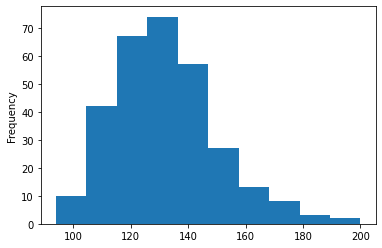

In [109]:
datosPacientes['presionReposo'].plot.hist()

### Agrupamiento

* **groupby()** es un método que permite agrupar datos según un criterio.
* Una vez agrupados, el resultado se obtiene haciendo una operación de reducción.

Supongamos que queremos saber la edad promedio de las personas según cada tipo de dolor de pecho.

In [110]:
datosPacientes.groupby(['tipoDolor'])[['edad']].mean()

,edad
tipoDolor,
0,55.692308
1,51.360000
2,53.517241
3,55.869565


Veamos si hombres o mujeres tienden a tener el azúcar más alto en ayunas.

In [111]:
datosPacientes.groupby(['sexo'])[['azucarAyunas']].sum() #Aqui se calcula la suma, Consideracion propia: Segun entiendo para lo que se busca es mejor usar el promedio 
#para considerar la cantidad de hombres total y la de mujeres total
#en este caso count() no sirve, porque daria el dato total de hombre y mujeres, no se sus valores de azucar

,azucarAyunas
sexo,
H,33
M,12


## <font color='purple'>**Con groupby(), ¿cómo averiguamos cuán propensa está una persona con nivel alto de azúcar a padecer una enfermedad del corazón?**</font>

In [114]:
datosPacientes.groupby(['presencia'])[['azucarAyunas']].sum()

,azucarAyunas
presencia,
0,22
1,6
2,6
3,10
4,1


# Guardando datos con Pandas

* **to_csv()** permite guardar los datos de un DataFrame en un archivo csv.
* Al igual que para leer los datos, se necesita indicar la dirección donde será guardado el archivo.
* Se puede elegir un delimitador, por defecto es ",".

In [115]:
datosPacientesO = datosPacientes[datosPacientes['presencia']==4] #Guardo solo los de los pacientes con presencia = a 4, o sea los muy propensos.
datosPacientesO

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No. Seguro
24,40,H,3,140,199,0,178,4,7960
40,51,M,2,140,308,0,142,4,15708
45,52,H,1,120,325,0,172,4,16900
47,47,H,2,138,257,0,156,4,12079
121,59,H,0,138,271,0,182,4,15989
136,60,M,2,120,178,1,96,4,10680
146,44,M,2,118,242,0,149,4,10648
153,66,M,2,146,278,0,152,4,18348
161,55,M,1,132,342,0,166,4,18810
174,60,H,0,130,206,0,132,4,12360


In [116]:
datosPacientesO.to_csv('pacientesO.csv',sep=';') #Se le puso de separador ; para probar que se puede hacer asi.

In [117]:
!cat pacientesO.csv

;edad;sexo;tipoDolor;presionReposo;colesterolSerico;azucarAyunas;latidosMax;presencia;No. Seguro
24;40;H;3;140;199;0;178;4;7960
40;51;M;2;140;308;0;142;4;15708
45;52;H;1;120;325;0;172;4;16900
47;47;H;2;138;257;0;156;4;12079
121;59;H;0;138;271;0;182;4;15989
136;60;M;2;120;178;1;96;4;10680
146;44;M;2;118;242;0;149;4;10648
153;66;M;2;146;278;0;152;4;18348
161;55;M;1;132;342;0;166;4;18810
174;60;H;0;130;206;0;132;4;12360
211;61;H;0;120;260;0;140;4;15860
264;54;H;0;110;206;0;108;4;11124
285;46;H;0;140;311;0;120;4;14306
